In [1]:
import os
GCP_PROJECT_ID=os.getenv('PROJECT_ID')
GCS_BUCKET_NAME=os.getenv('BUCKET_NAME')

In [2]:
import sys
sys.path.append(os.path.join(os.getcwd(), '../'))


In [3]:
# read the dataset 
from cloud.gcs_storage_operations import GCSDataOperations
gcs = GCSDataOperations(GCP_PROJECT_ID)
df = gcs.read_parquet(GCS_BUCKET_NAME, "clean_data.parquet")

INFO:cloud.gcs_storage_operations:GCS Data client initialized successfully
INFO:cloud.gcs_storage_operations:Parquet read successfully (297128 rows, 17 columns)


In [4]:
df.head()

,id,price,year,manufacturer,model,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,census_region
27,7316814884,33590,2014.0,gmc,Sierra,gas,57923.0,clean,automatic,4wd,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,East South Central
28,7316814758,22590,2010.0,chevrolet,silverado,gas,71229.0,clean,automatic,4wd,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,East South Central
29,7316814989,39590,2020.0,chevrolet,silverado,gas,19160.0,clean,automatic,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,East South Central
30,7316743432,30990,2017.0,toyota,Tundra,gas,41124.0,clean,automatic,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,East South Central
31,7316356412,15000,2013.0,ford,F-150,gas,128000.0,clean,automatic,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,East South Central


In [5]:
df.isnull().sum()

id               0
price            0
year             0
manufacturer     0
model            0
fuel             0
odometer         0
title_status     0
transmission     0
drive            0
type             0
paint_color      0
description      0
state            0
lat              0
long             0
census_region    0
dtype: int64

In [6]:
df.describe()

,id,price,year,odometer,lat,long
count,2.971280e+05,297128.000000,297128.000000,297128.000000,297128.000000,297128.000000
mean,7.311391e+09,20198.557208,2012.764795,89506.657636,38.694284,-93.999626
std,4.404940e+06,14478.040098,5.624866,62996.853221,5.740002,17.844960
min,7.301583e+09,500.000000,1990.000000,0.000000,18.852034,-159.590001
25%,7.307964e+09,8799.000000,2009.000000,34808.000000,34.982162,-108.577721
50%,7.312370e+09,16997.000000,2014.000000,82432.500000,39.433086,-87.752954
75%,7.315168e+09,28990.000000,2017.000000,132185.000000,42.449550,-80.759936
max,7.317101e+09,299991.000000,2022.000000,500000.000000,65.735076,-67.143300


In [7]:
df.drop(columns=['description','id'], inplace=True)

In [8]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state',
       'lat', 'long', 'census_region'],
      dtype='object')

In [9]:
df = df[df['price']<=70000]

In [10]:
data=df.copy()

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# testing linear regression 

categorical_columns = ['manufacturer', 'model', 'fuel', 'title_status', 
                          'transmission', 'drive', 'type', 'paint_color', 'state', 'census_region']
    
label_encoders = {}
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
        print(f"Encoded {col}: {len(le.classes_)} unique values")

Encoded manufacturer: 66 unique values
Encoded model: 935 unique values
Encoded fuel: 4 unique values
Encoded title_status: 6 unique values
Encoded transmission: 2 unique values
Encoded drive: 3 unique values
Encoded type: 13 unique values
Encoded paint_color: 12 unique values
Encoded state: 51 unique values
Encoded census_region: 9 unique values


In [13]:
data.columns

Index(['price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state',
       'lat', 'long', 'census_region'],
      dtype='object')

In [14]:
# data cleaning 



In [15]:
feature_columns=['year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state',
       'lat', 'long', 'census_region']

target_column='price'

In [16]:
# Prepare features and target
X = data[feature_columns]
y = data[target_column]

In [17]:
print(f"Dataset shape: {X.shape}")
print(f"Target variable: {target_column}")
print(f"Features: {len(feature_columns)} total")

Dataset shape: (295163, 14)
Target variable: price
Features: 14 total


In [18]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
) 

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples\n")

Training set: 236130 samples
Test set: 59033 samples



In [19]:
# 2. Then scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Learn parameters from training data only
X_test_scaled = scaler.transform(X_test)        # Apply same parameters to test data

In [20]:
from sklearn.neighbors import KNeighborsRegressor




In [21]:
print("Training Linear Regression model...")
lr_model =  KNeighborsRegressor(n_neighbors=5)
lr_model.fit(X_train_scaled, y_train)

Training Linear Regression model...


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

In [23]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [24]:
print("\n=== MODEL PERFORMANCE ===")
print(f"Training RMSE: ${train_rmse:,.2f}")
print(f"Test RMSE: ${test_rmse:,.2f}")
print(f"Training MAE: ${train_mae:,.2f}")
print(f"Test MAE: ${test_mae:,.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


=== MODEL PERFORMANCE ===
Training RMSE: $4,612.30
Test RMSE: $5,809.08
Training MAE: $2,762.64
Test MAE: $3,566.79
Training R²: 0.8808
Test R²: 0.8096


In [25]:
y_train.mean()

np.float64(19773.721221361113)

In [26]:
# from seaborn import histplot


# histplot(df['price'])

In [27]:
df['type'].value_counts()

type
suv            75589
sedan          75137
pickup         37964
truck          33102
other          15966
coupe          14933
hatchback      14848
wagon           8756
van             8358
convertible     5352
minivan         4332
offroad          486
bus              340
Name: count, dtype: int64

In [28]:
df.groupby('type')['price'].mean()

type
bus            15812.558824
convertible    19203.721413
coupe          22607.812094
hatchback      15476.449084
minivan        10323.198061
offroad        19619.421811
other          28231.155205
pickup         28337.622300
sedan          14584.127993
suv            17439.062522
truck          26613.364842
van            18755.873534
wagon          14144.390361
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

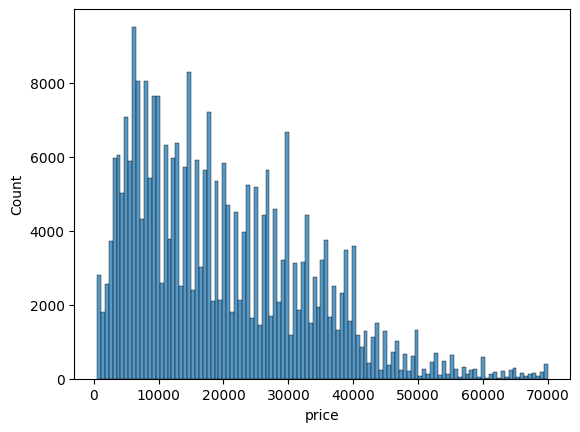

In [29]:
from seaborn import histplot


histplot(df['price'])